In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_cotton=pd.read_csv('Unprocessed Data.csv')
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Andhra Pradesh,2004,NaN,NaN,NaN,NaN,NaN,NaN,575,560,579
1,Andhra Pradesh,2005,NaN,NaN,NaN,NaN,NaN,NaN,400,385,519
2,Andhra Pradesh,2006,NaN,NaN,NaN,NaN,NaN,NaN,290,286,787
3,Andhra Pradesh,2007,97.0,88.0,87.0,49.0,90.0,65.0,255,248,662
4,Andhra Pradesh,2008,NaN,NaN,NaN,NaN,NaN,NaN,340,338,682
...,...,...,...,...,...,...,...,...,...,...,...
167,Telangana,2013,NaN,NaN,NaN,NaN,NaN,NaN,235,136,547
168,Telangana,2014,NaN,NaN,NaN,NaN,NaN,NaN,190,183,656
169,Telangana,2015,99.0,86.0,73.0,39.0,96.0,105.0,250,248,912
170,Telangana,2016,NaN,NaN,NaN,NaN,NaN,NaN,300,275,733


# Data Pre-processing (1)

In [3]:
df_cotton.isna().sum()

State                                   0
Year                                    0
Nitrogen (%)                          135
Nitrogen (Pounds/Acre)                135
Phosphorous (%)                       135
Phosphorous (Pounds/Acre)             135
Potash (%)                            135
Potash (Pounds/Acre)                  135
Area Planted (acres)                    0
Harvested Area (acres)                  0
Lint Yield (Pounds/Harvested Acre)      0
dtype: int64

In [4]:
df_cotton.groupby('State').mean()

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Andhra Pradesh,2010.5,96.333333,94.333333,79.000000,54.666667,83.333333,81.000000,397.142857,389.785714,799.285714
Assam,2010.5,98.000000,120.000000,50.000000,43.000000,15.000000,9.000000,163.142857,161.571429,1483.500000
Gujarat,2010.5,98.250000,127.000000,79.750000,45.750000,82.500000,86.750000,555.357143,546.785714,1060.071429
Haryana,2010.5,95.000000,110.000000,33.500000,52.500000,26.500000,48.000000,112.571429,111.285714,1628.000000
Karnataka,2010.5,98.000000,96.750000,85.000000,56.250000,92.500000,94.250000,1268.571429,1237.500000,867.571429
Madhya Pradesh,2010.5,100.000000,87.000000,70.000000,35.000000,63.000000,76.000000,252.142857,243.142857,936.428571
Maharashtra,2008.5,98.285714,110.714286,39.428571,60.285714,59.428571,100.714286,673.611111,664.277778,993.833333
Orissa,2010.5,99.000000,108.750000,82.500000,40.000000,94.000000,71.750000,319.500000,311.571429,1079.071429
Punjab,2010.5,100.000000,102.250000,96.500000,55.750000,85.750000,89.250000,365.357143,357.642857,922.857143


In [5]:
df_cotton=df_cotton.fillna(df_cotton.groupby('State').transform('mean'))

In [6]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Andhra Pradesh,2004,96.333333,94.333333,79.0,54.666667,83.333333,81.0,575,560,579
1,Andhra Pradesh,2005,96.333333,94.333333,79.0,54.666667,83.333333,81.0,400,385,519
2,Andhra Pradesh,2006,96.333333,94.333333,79.0,54.666667,83.333333,81.0,290,286,787
3,Andhra Pradesh,2007,97.000000,88.000000,87.0,49.000000,90.000000,65.0,255,248,662
4,Andhra Pradesh,2008,96.333333,94.333333,79.0,54.666667,83.333333,81.0,340,338,682
...,...,...,...,...,...,...,...,...,...,...,...
167,Telangana,2013,99.000000,88.500000,76.0,42.500000,95.000000,99.5,235,136,547
168,Telangana,2014,99.000000,88.500000,76.0,42.500000,95.000000,99.5,190,183,656
169,Telangana,2015,99.000000,86.000000,73.0,39.000000,96.000000,105.0,250,248,912
170,Telangana,2016,99.000000,88.500000,76.0,42.500000,95.000000,99.5,300,275,733


In [7]:
df_cotton.isna().sum()

State                                 0
Year                                  0
Nitrogen (%)                          0
Nitrogen (Pounds/Acre)                0
Phosphorous (%)                       0
Phosphorous (Pounds/Acre)             0
Potash (%)                            0
Potash (Pounds/Acre)                  0
Area Planted (acres)                  0
Harvested Area (acres)                0
Lint Yield (Pounds/Harvested Acre)    0
dtype: int64

In [8]:
df_cotton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               172 non-null    object 
 1   Year                                172 non-null    int64  
 2   Nitrogen (%)                        172 non-null    float64
 3   Nitrogen (Pounds/Acre)              172 non-null    float64
 4   Phosphorous (%)                     172 non-null    float64
 5   Phosphorous (Pounds/Acre)           172 non-null    float64
 6   Potash (%)                          172 non-null    float64
 7   Potash (Pounds/Acre)                172 non-null    float64
 8   Area Planted (acres)                172 non-null    int64  
 9   Harvested Area (acres)              172 non-null    int64  
 10  Lint Yield (Pounds/Harvested Acre)  172 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usa

# Data Visualization

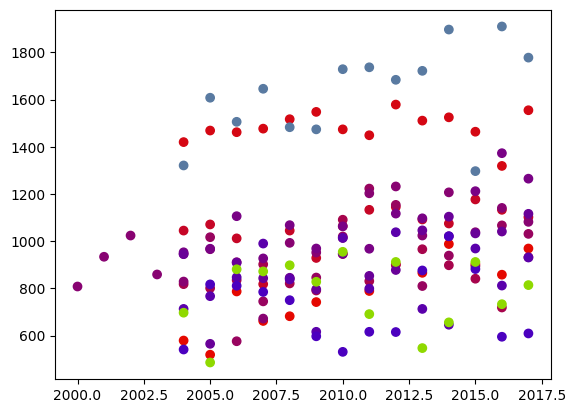

In [9]:
fig, ax = plt.subplots()

colors = {'Andhra Pradesh':'#E50800',
          'Assam':'#D50713',
          'Gujarat':'#C60626',
          'Haryana':'#597AA1',
          'Karnataka':'#A7044C',
          'Madhya Pradesh':'#98045F',
          'Maharashtra':'#880372',
          'Orissa':'#790285',
          'Punjab':'#690198',
          'Rajasthan':'#5A00AB',
          'Tamil Nadu':'#4B00BF',
          'Telangana':'#8FD900'
          }

ax.scatter(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'], c=df_cotton['State'].apply(lambda x: colors[x]),)

plt.show()

Text(0.5, 1.0, 'Potash (Pounds/Acre)')

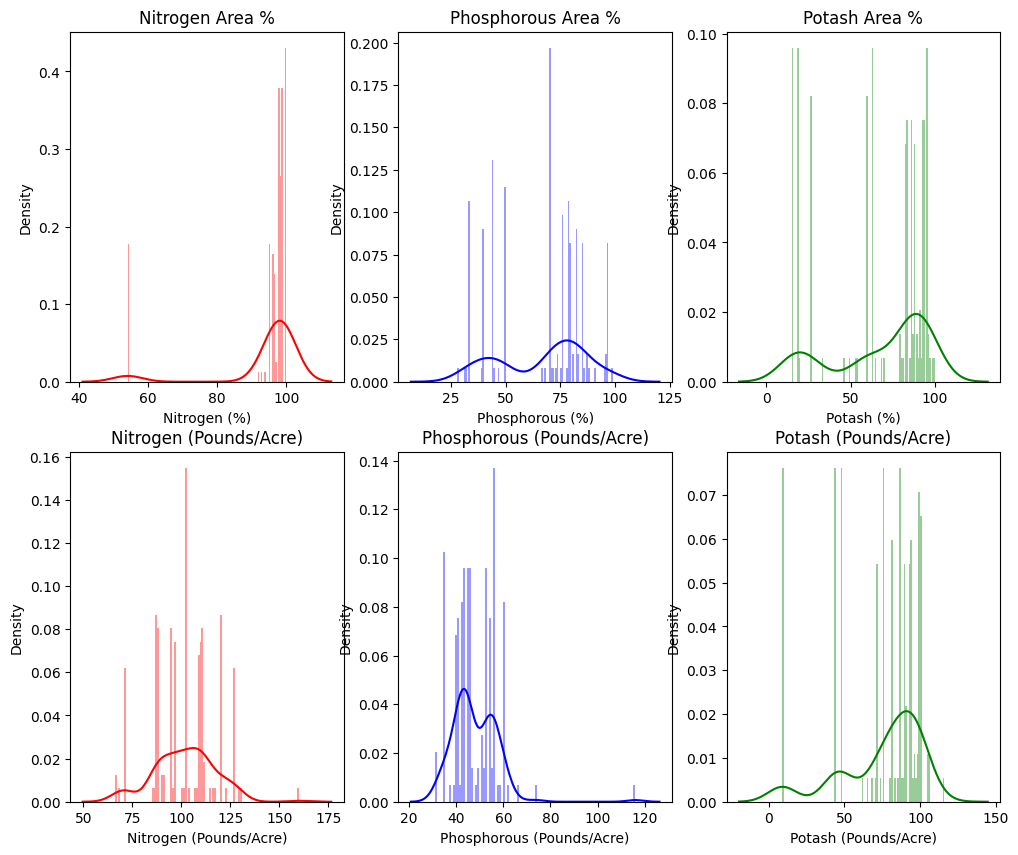

In [10]:
plt.figure(figsize=(12,10))
plt.subplot(231) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (%)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen Area %')

plt.subplot(232) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (%)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous Area %')

plt.subplot(233) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (%)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash Area %')

plt.subplot(234) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (Pounds/Acre)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen (Pounds/Acre)')

plt.subplot(235) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (Pounds/Acre)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous (Pounds/Acre)')

plt.subplot(236) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (Pounds/Acre)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash (Pounds/Acre)')

Text(0.5, 0, 'State Name')

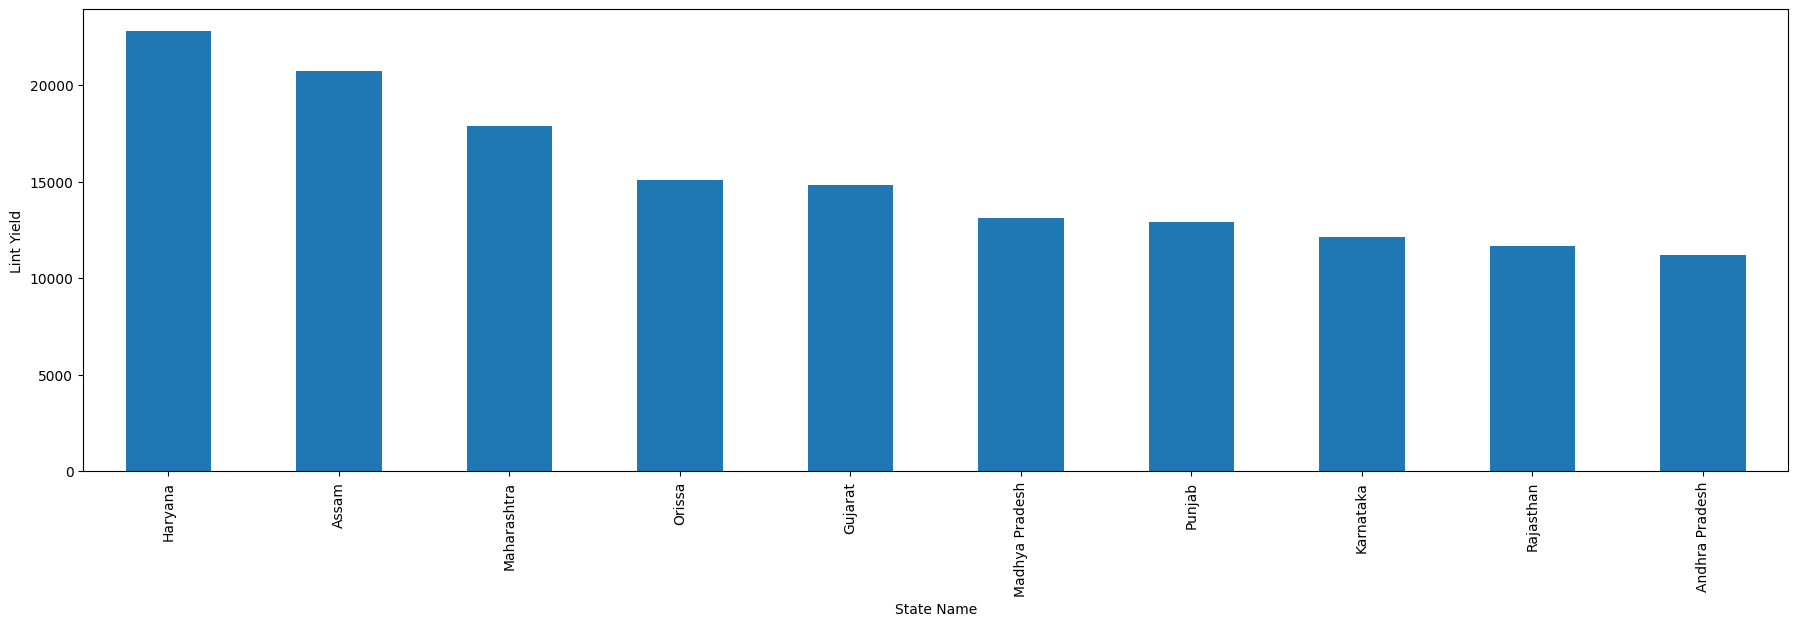

In [11]:
plt.figure(figsize=(22,6))
GraphData=df_cotton.groupby(['State'])['Lint Yield (Pounds/Harvested Acre)'].sum().nlargest(10)


GraphData.plot(kind='bar')
plt.ylabel('Lint Yield')
plt.xlabel('State Name')

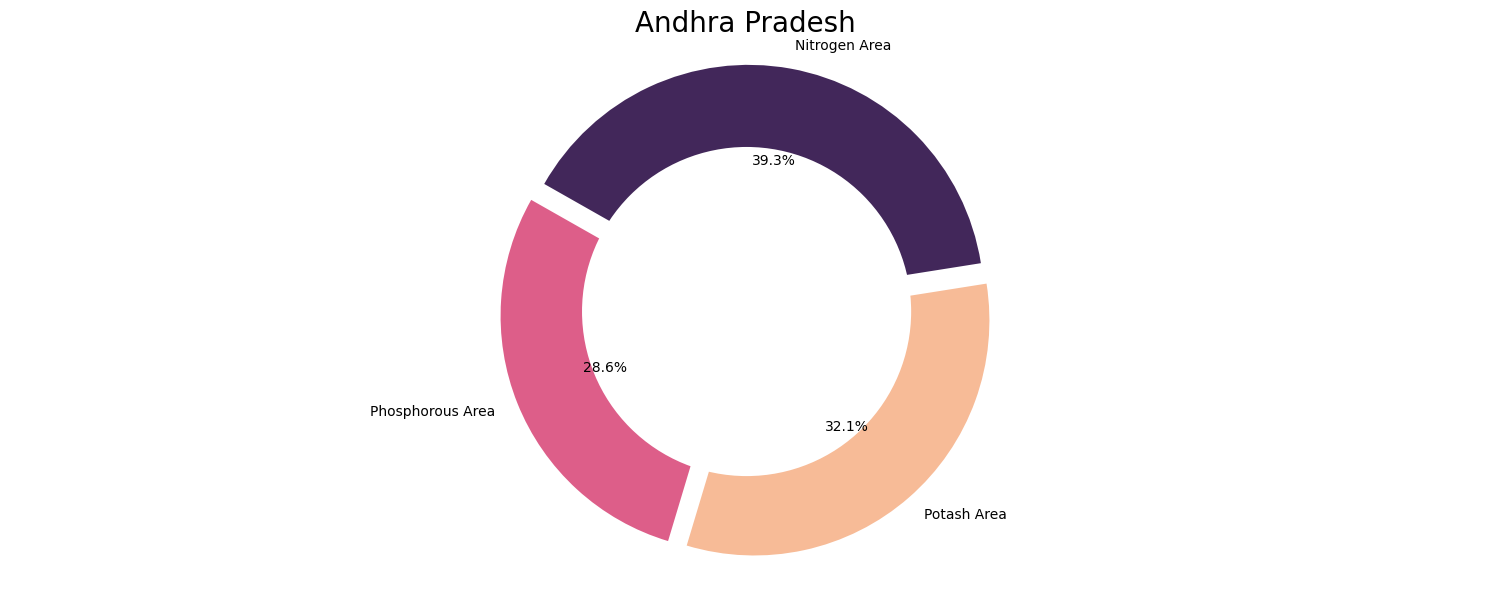

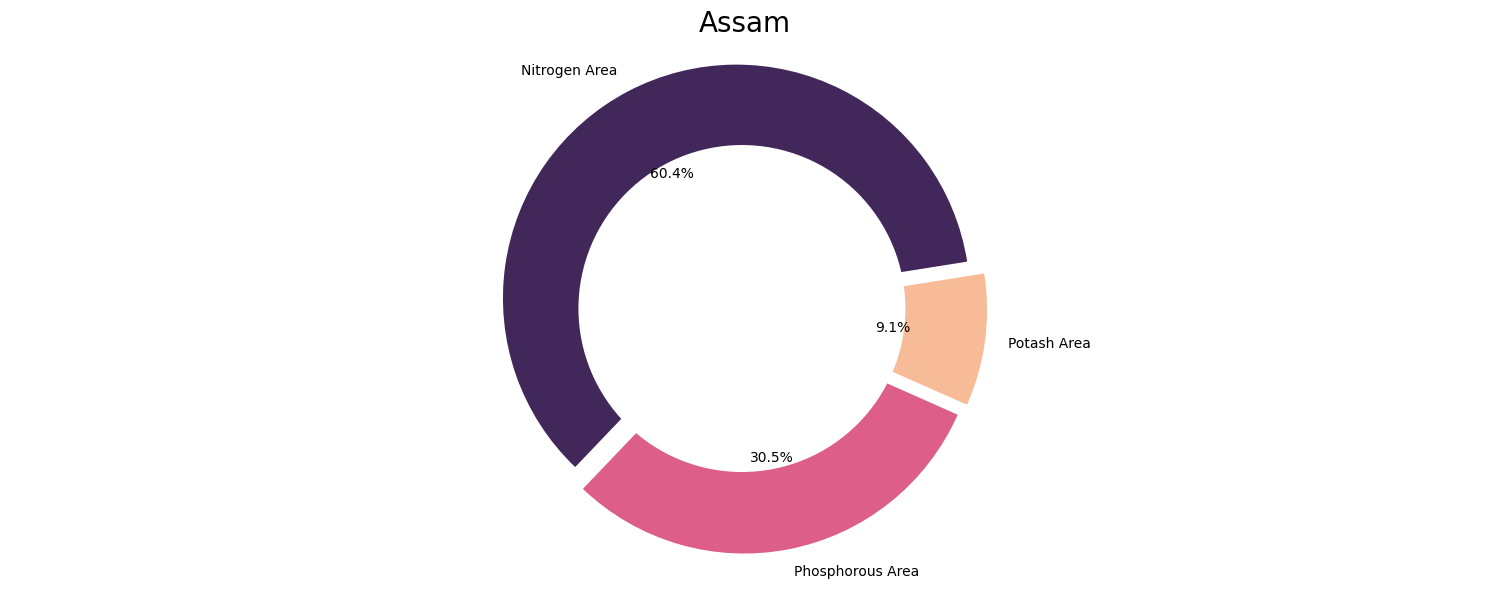

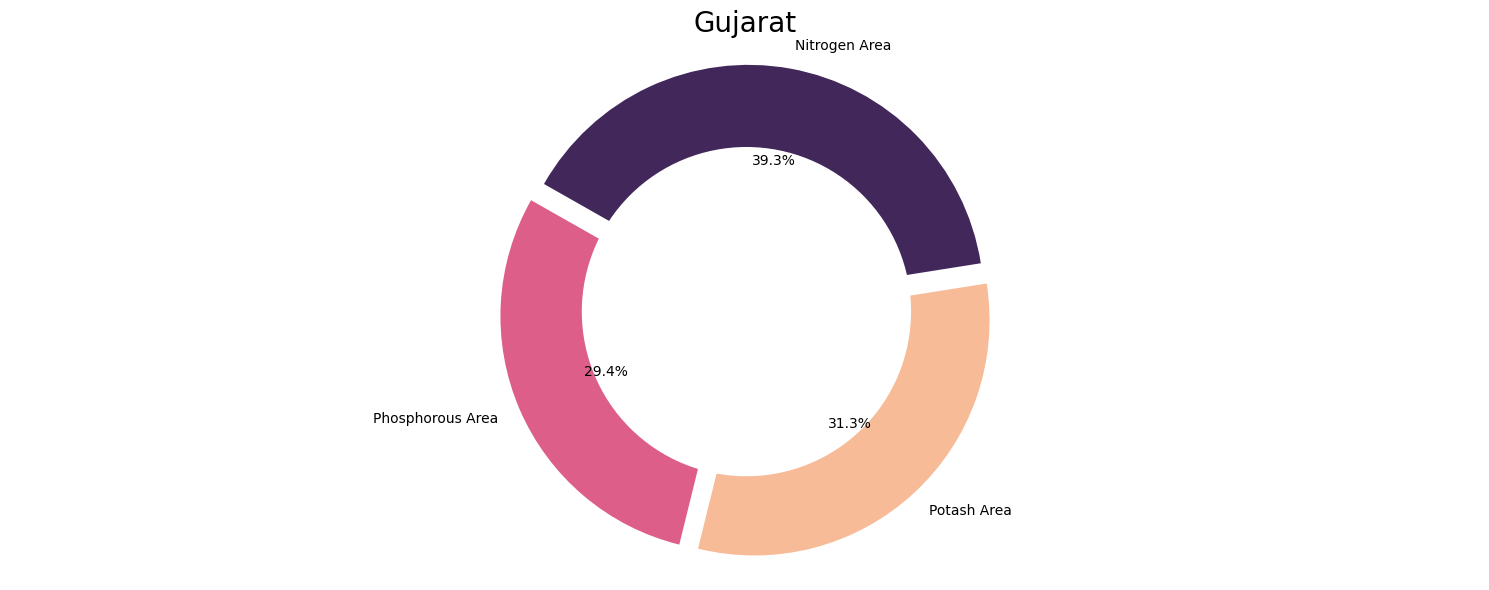

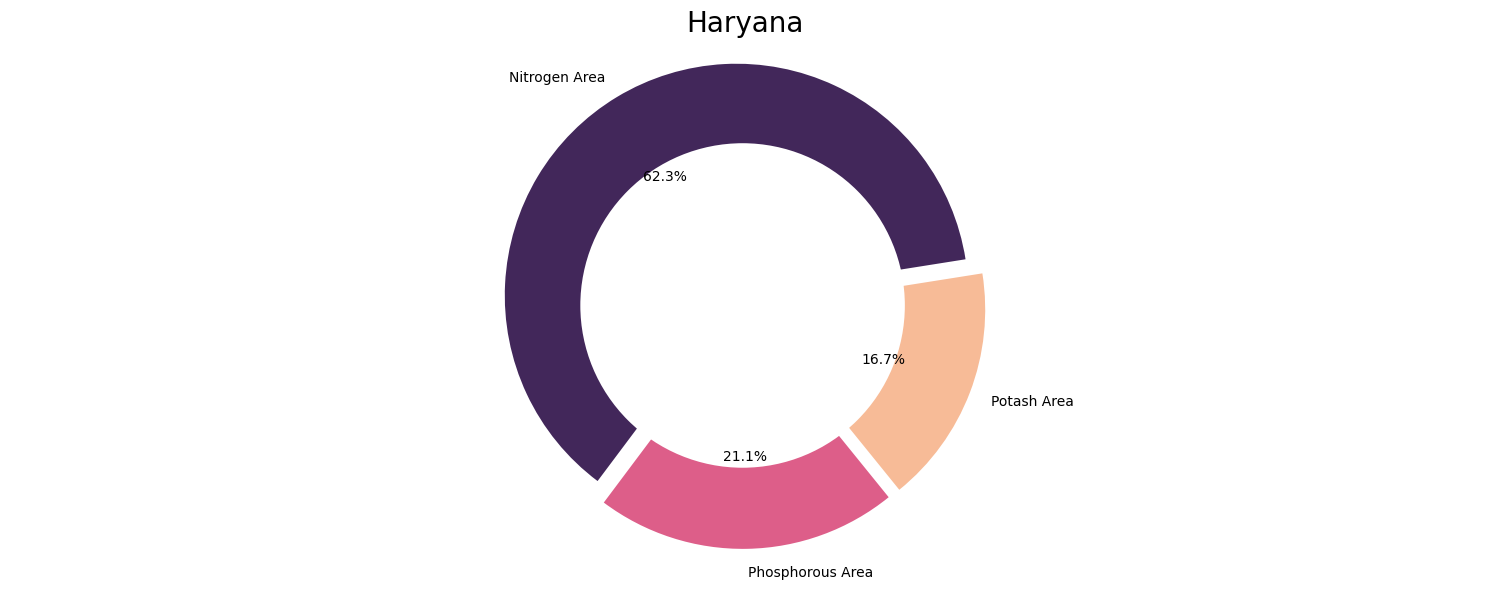

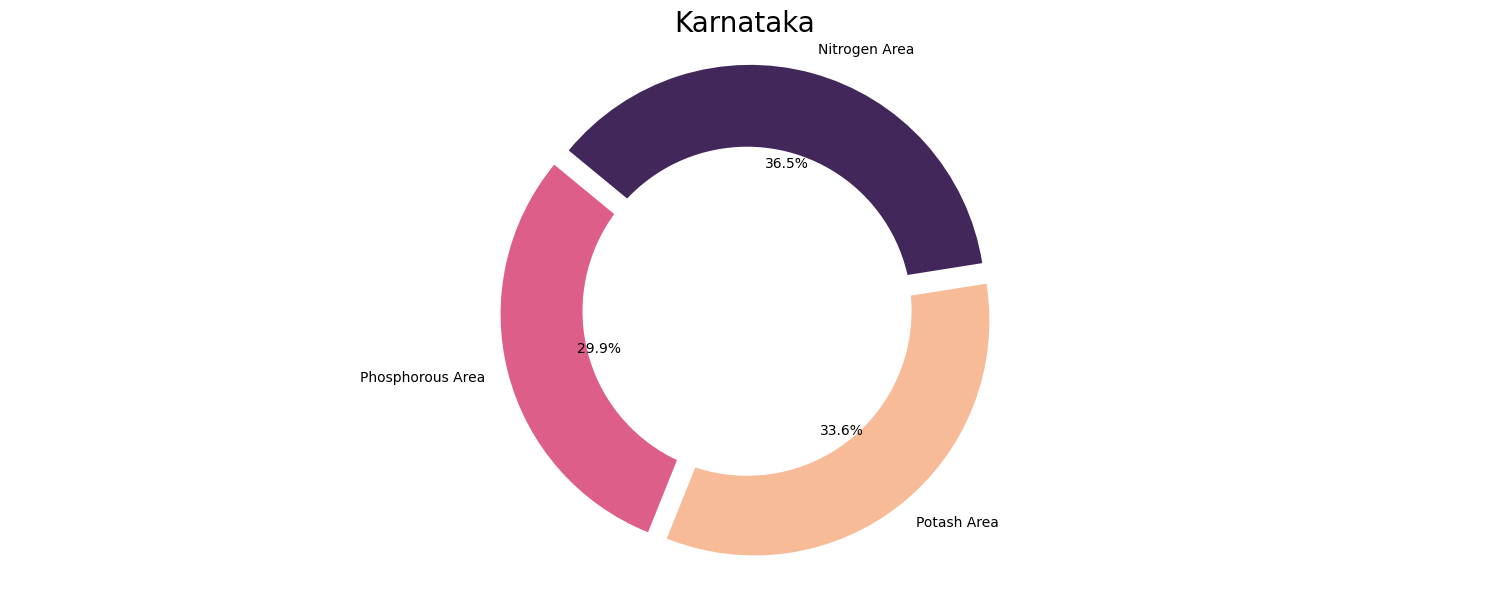

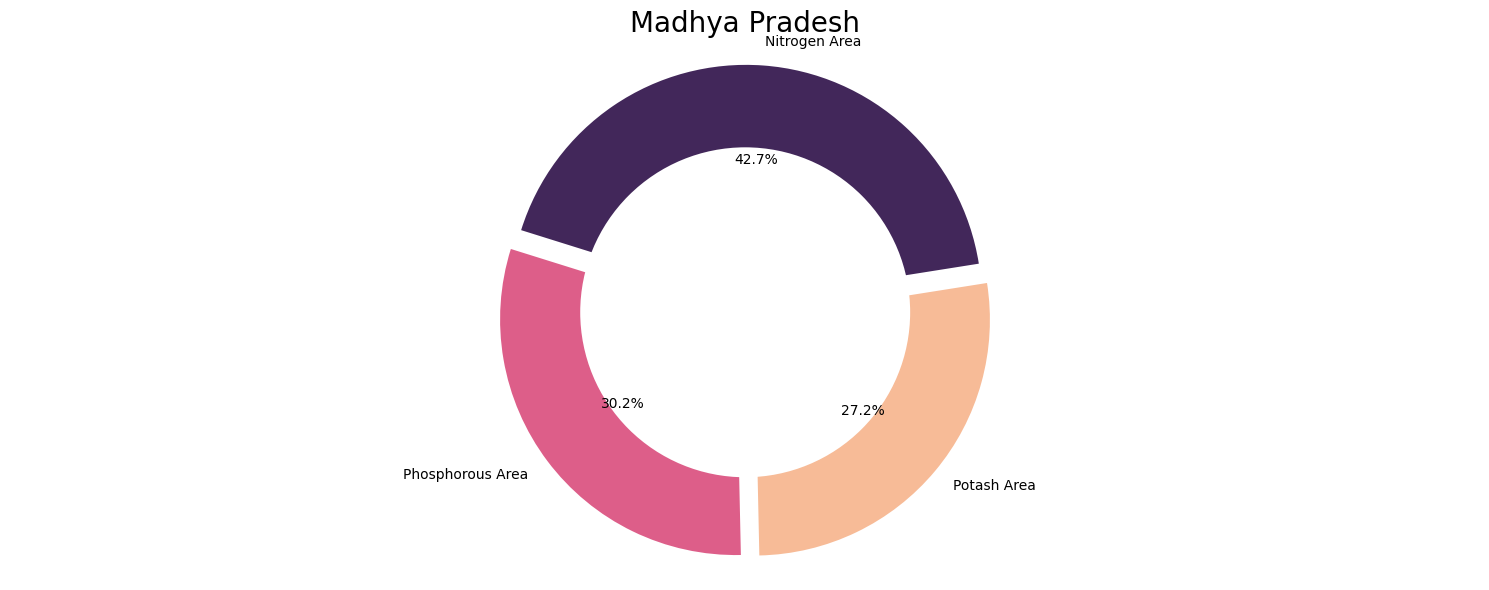

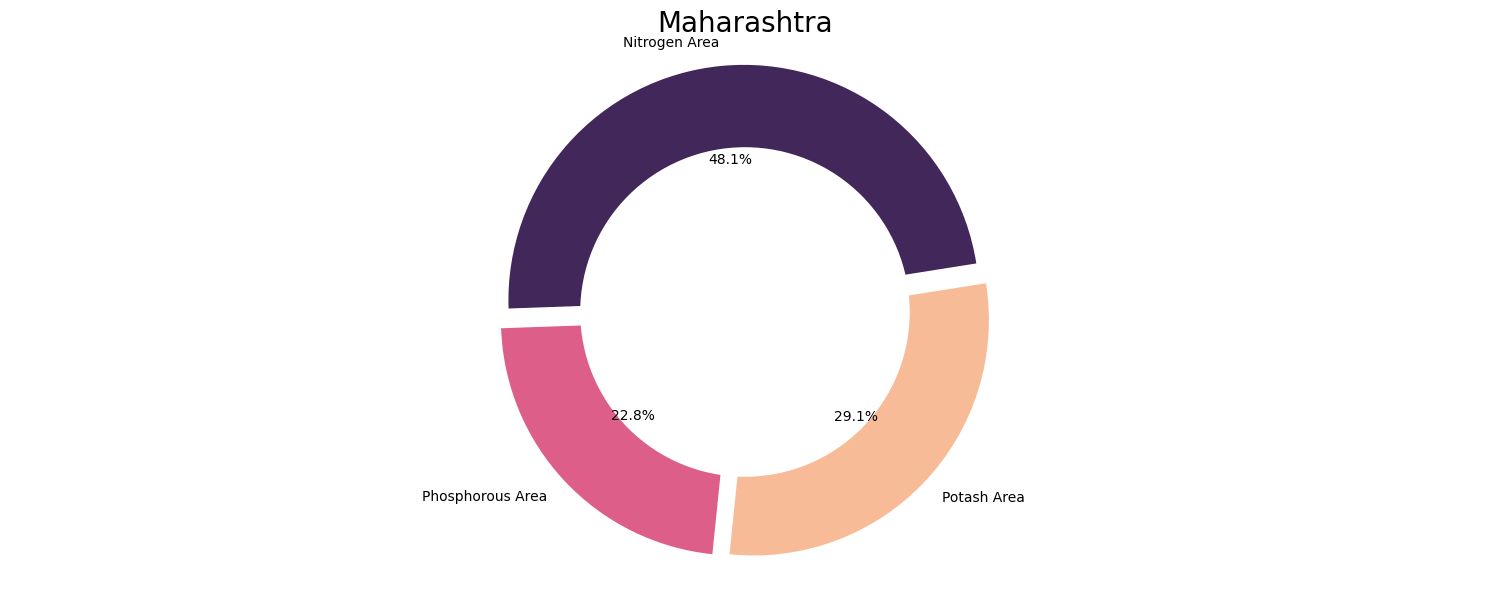

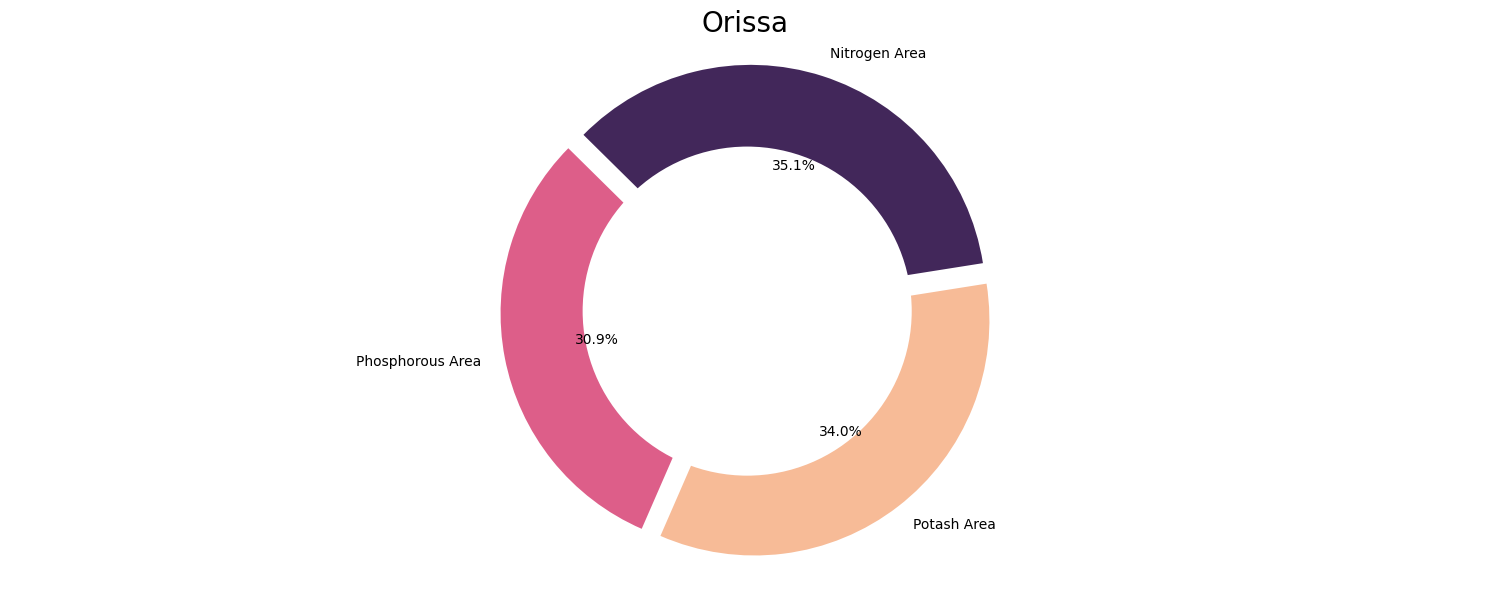

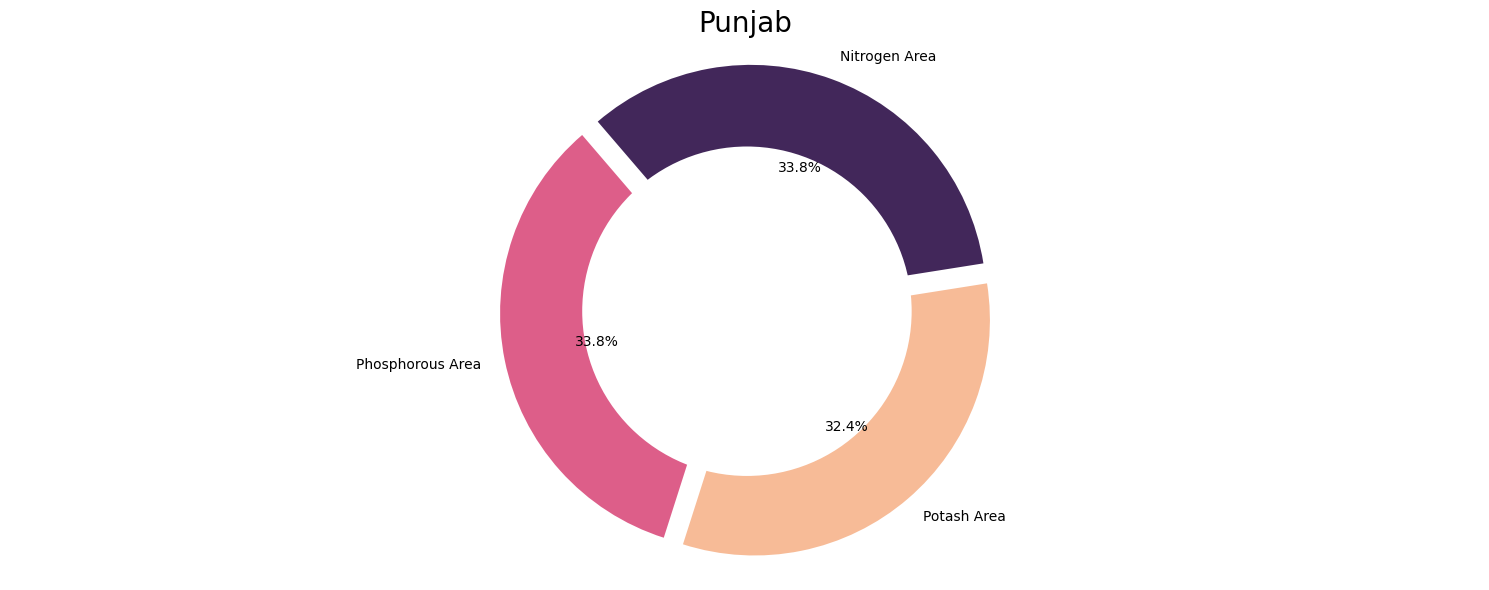

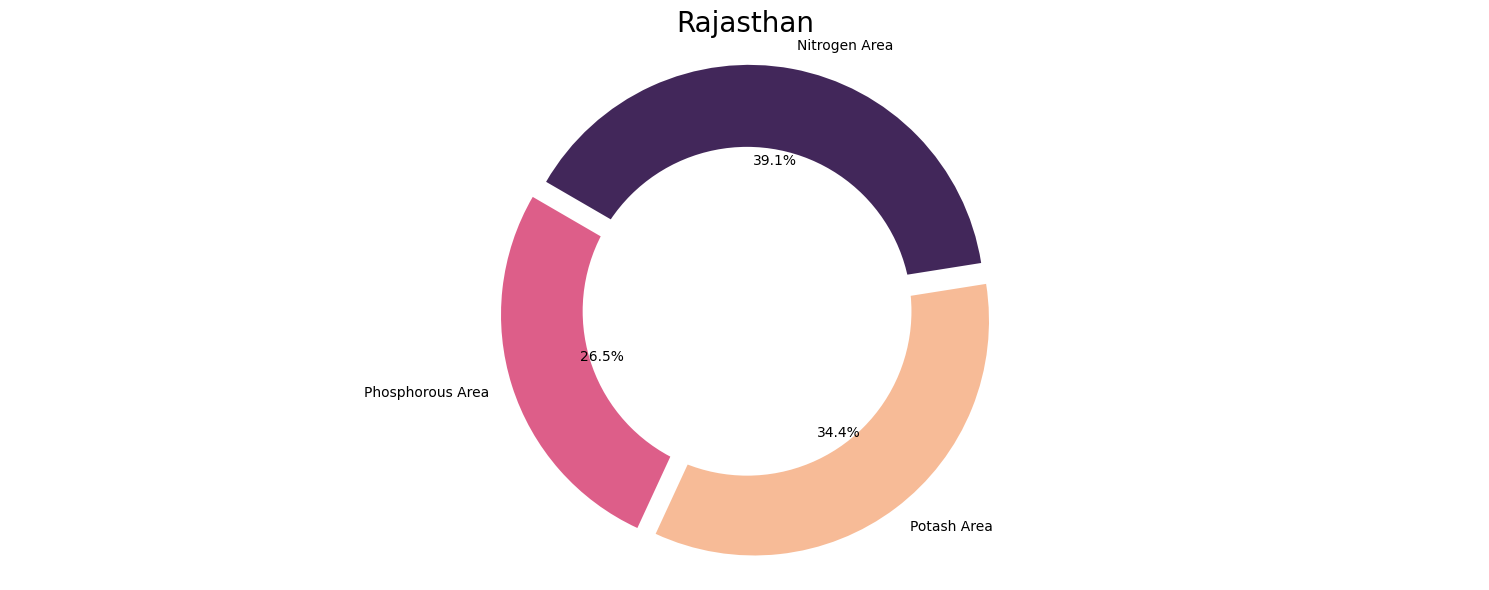

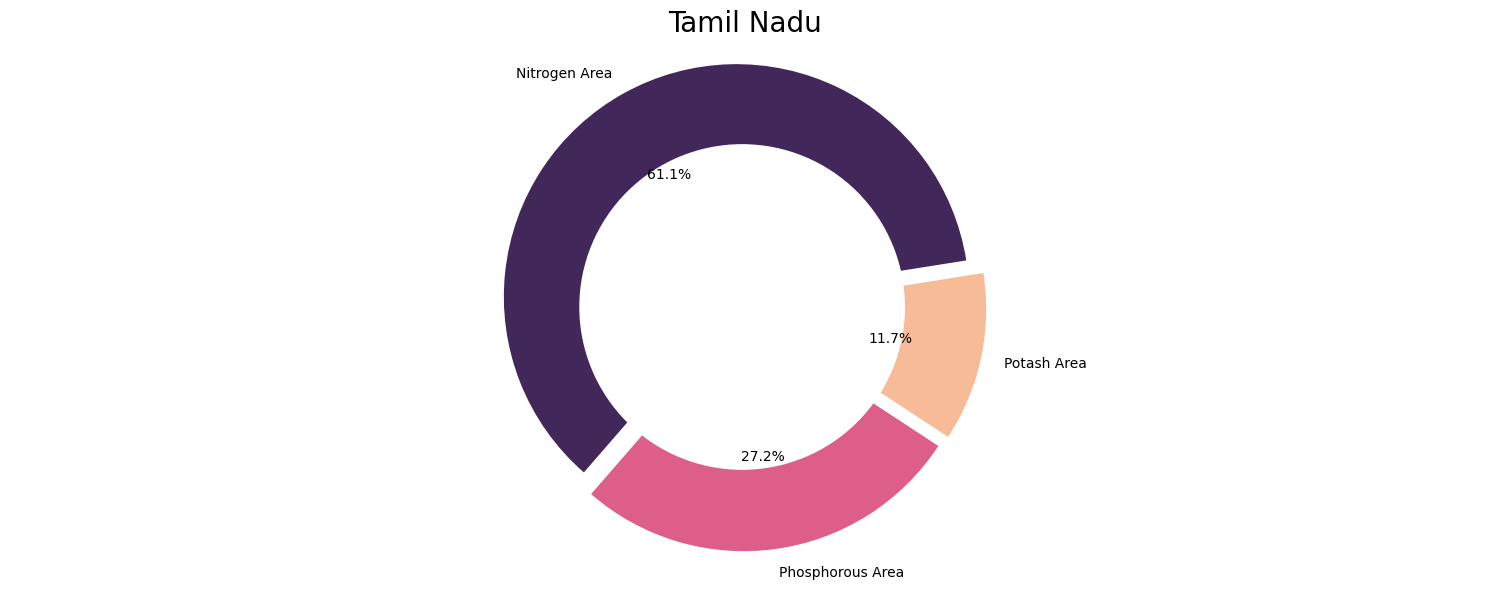

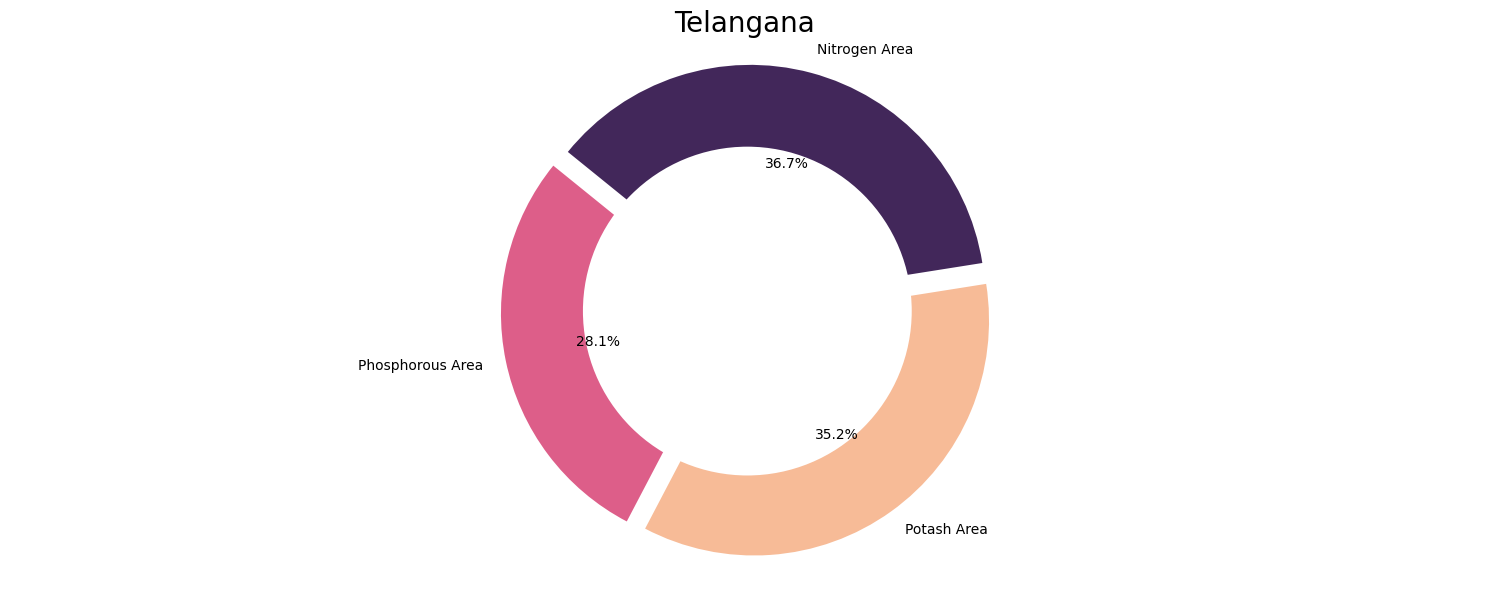

In [12]:
def plot_pie(nitrogen,phosphorous,potash,title):
    labels = ['Nitrogen Area','Phosphorous Area','Potash Area']
    sizes = [nitrogen,phosphorous,potash]
    color= ['#42275a','#dd5e89','#f7bb97']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title,fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
    
States = df_cotton['State'].unique().tolist()
States

state_df = pd.DataFrame()

for state in States:
    one_state_df = df_cotton.loc[df_cotton['State'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    phosphorous = one_state_df['Phosphorous (%)'].values[-1]
    potash = one_state_df['Potash (%)'].values[-1]
    nitrogen = df_cotton['Nitrogen (%)'].values[-1]
    plot_pie(nitrogen,phosphorous,potash,state)

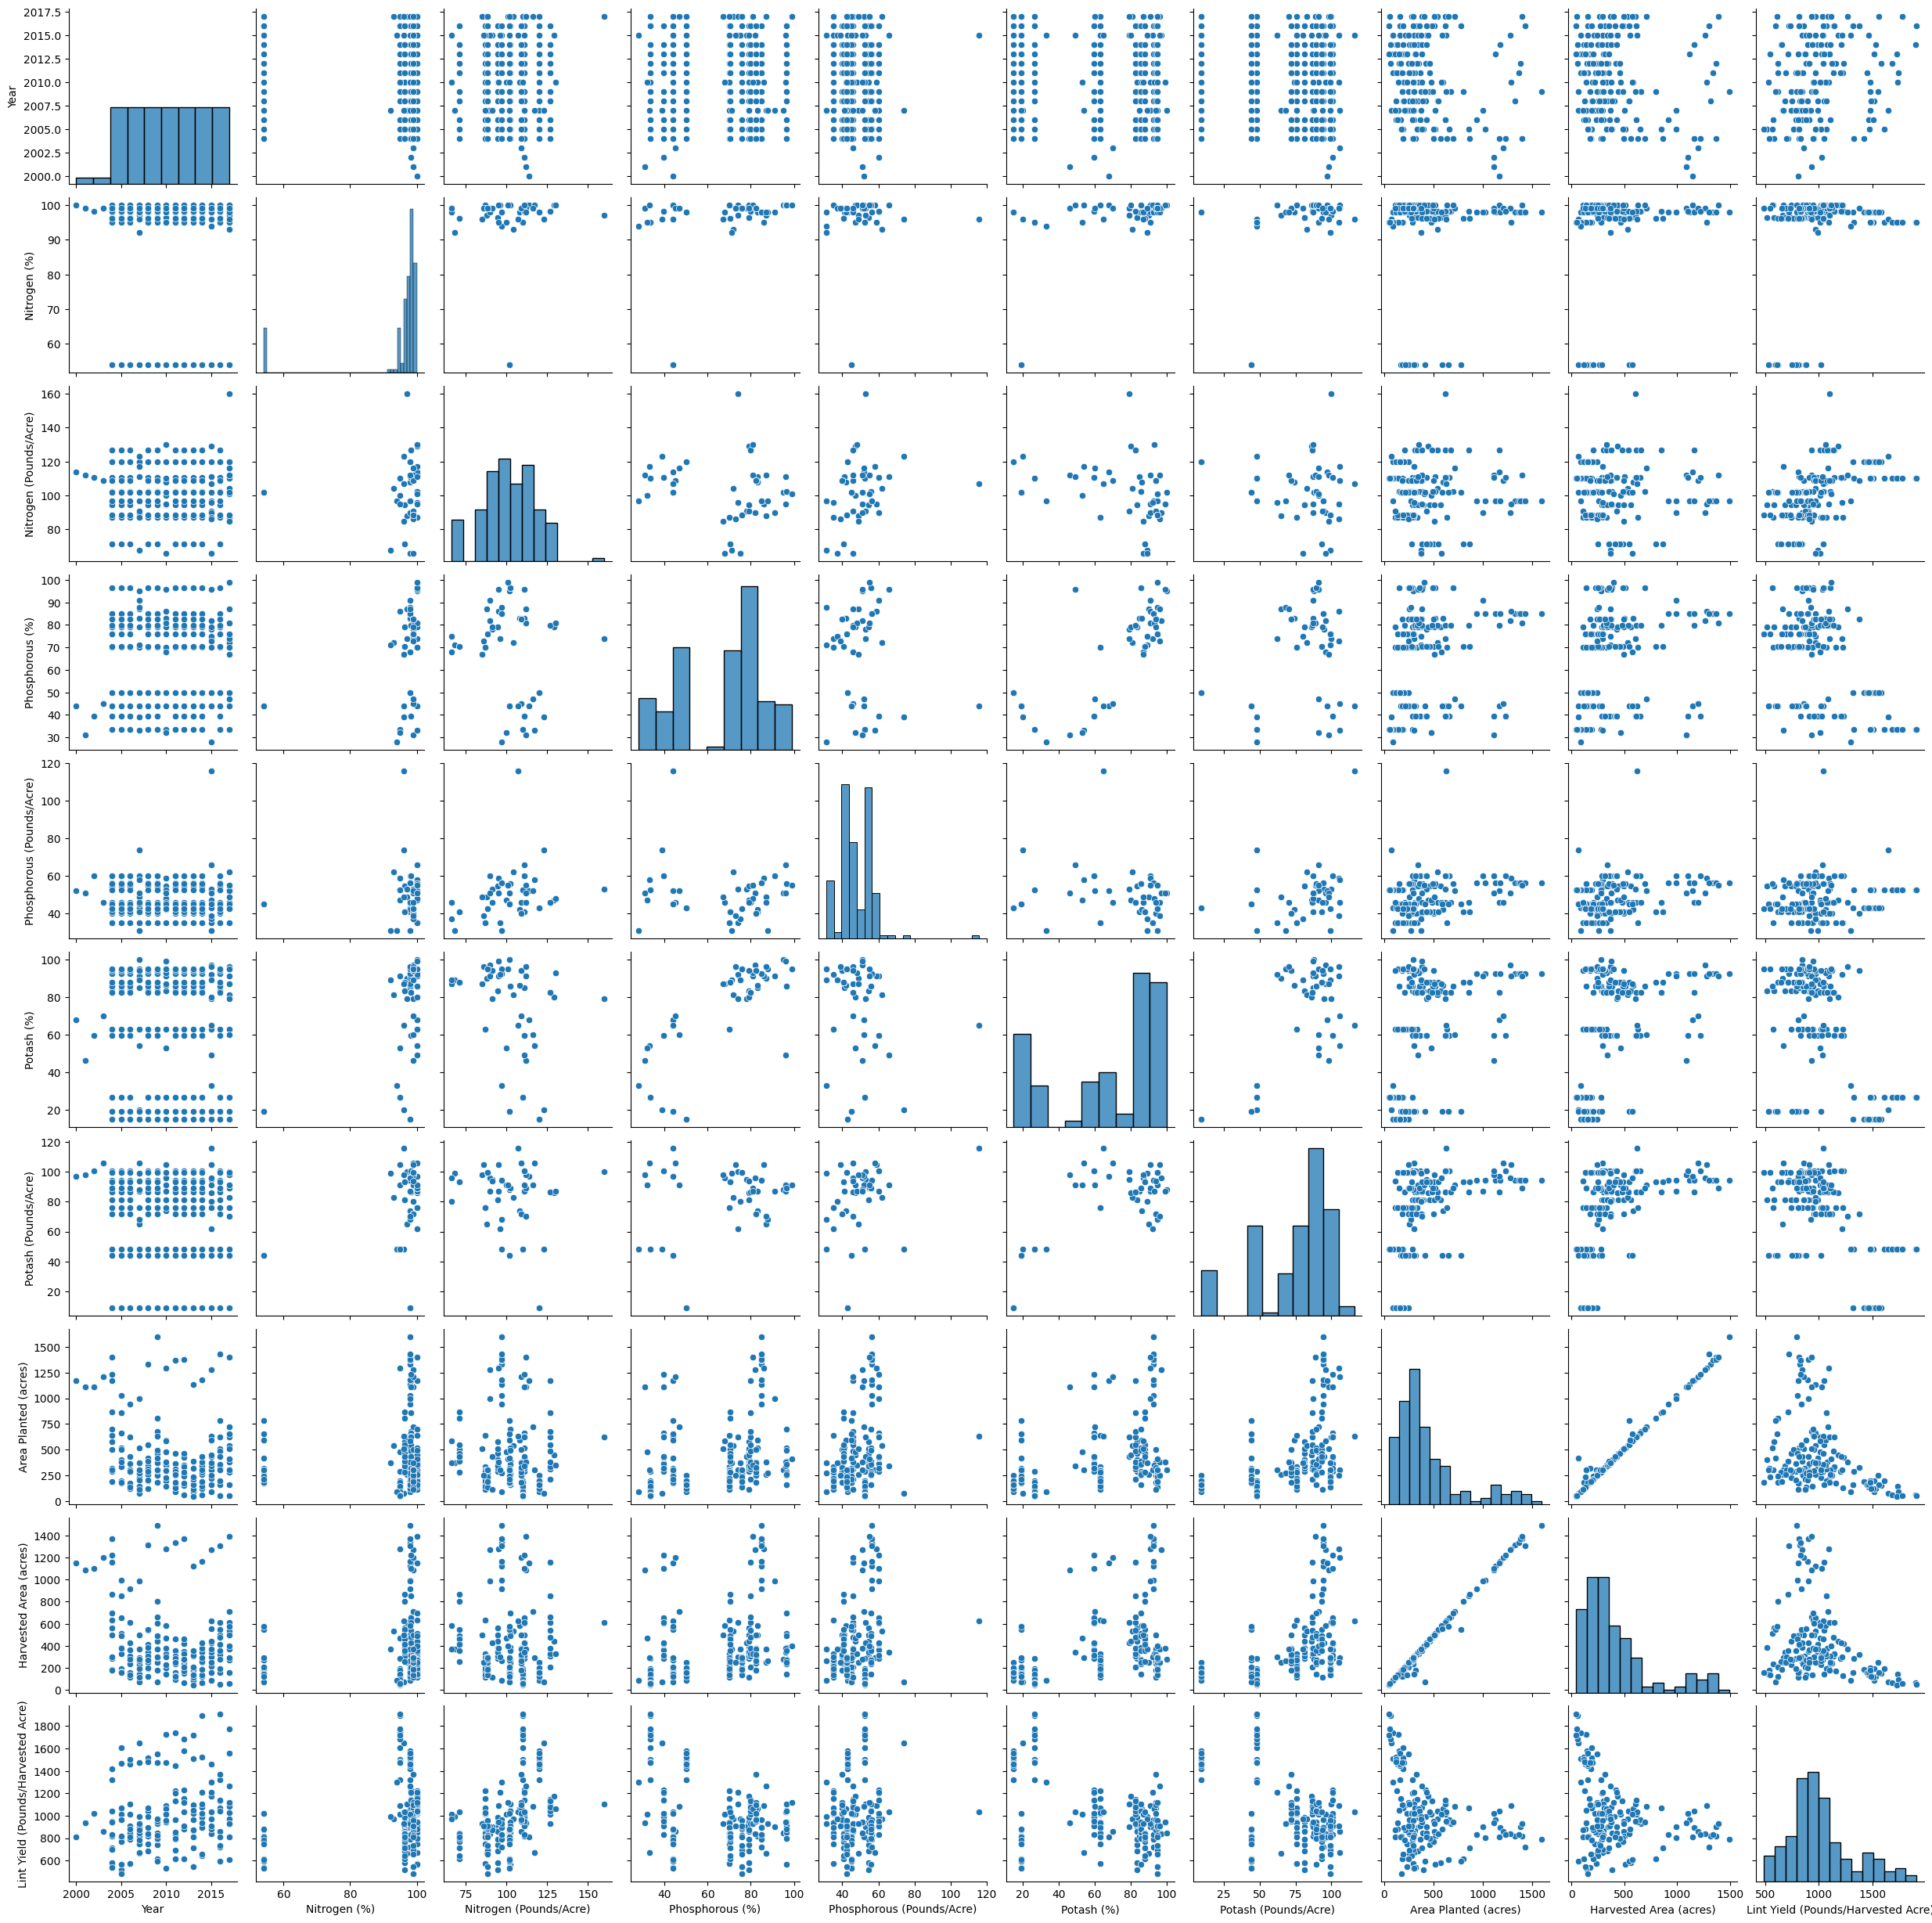

In [13]:
sns.pairplot(df_cotton)

# Data Pre-processing (2)

In [14]:
df_cotton['State'].unique()

array(['Andhra Pradesh', 'Assam', 'Gujarat', 'Haryana', 'Karnataka',
       'Madhya Pradesh', 'Maharashtra', 'Orissa', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana'], dtype=object)

In [15]:
mapping = ({'Andhra Pradesh':1,
'Assam':2,
'Gujarat':3,
'Haryana':4,
'Karnataka':5,
'Madhya Pradesh':6,
'Maharashtra':7,
'Orissa':8,
'Punjab':9,
'Rajasthan':10,
'Tamil Nadu':11,
'Telangana':12,
           })
df_cotton=df_cotton.replace({'State': mapping})

In [16]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,1,2004,96.333333,94.333333,79.0,54.666667,83.333333,81.0,575,560,579
1,1,2005,96.333333,94.333333,79.0,54.666667,83.333333,81.0,400,385,519
2,1,2006,96.333333,94.333333,79.0,54.666667,83.333333,81.0,290,286,787
3,1,2007,97.000000,88.000000,87.0,49.000000,90.000000,65.0,255,248,662
4,1,2008,96.333333,94.333333,79.0,54.666667,83.333333,81.0,340,338,682
...,...,...,...,...,...,...,...,...,...,...,...
167,12,2013,99.000000,88.500000,76.0,42.500000,95.000000,99.5,235,136,547
168,12,2014,99.000000,88.500000,76.0,42.500000,95.000000,99.5,190,183,656
169,12,2015,99.000000,86.000000,73.0,39.000000,96.000000,105.0,250,248,912
170,12,2016,99.000000,88.500000,76.0,42.500000,95.000000,99.5,300,275,733


In [17]:
x=df_cotton.drop('Lint Yield (Pounds/Harvested Acre)',axis=1)
y=df_cotton['Lint Yield (Pounds/Harvested Acre)']

x

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres)
0,1,2004,96.333333,94.333333,79.0,54.666667,83.333333,81.0,575,560
1,1,2005,96.333333,94.333333,79.0,54.666667,83.333333,81.0,400,385
2,1,2006,96.333333,94.333333,79.0,54.666667,83.333333,81.0,290,286
3,1,2007,97.000000,88.000000,87.0,49.000000,90.000000,65.0,255,248
4,1,2008,96.333333,94.333333,79.0,54.666667,83.333333,81.0,340,338
...,...,...,...,...,...,...,...,...,...,...
167,12,2013,99.000000,88.500000,76.0,42.500000,95.000000,99.5,235,136
168,12,2014,99.000000,88.500000,76.0,42.500000,95.000000,99.5,190,183
169,12,2015,99.000000,86.000000,73.0,39.000000,96.000000,105.0,250,248
170,12,2016,99.000000,88.500000,76.0,42.500000,95.000000,99.5,300,275


In [18]:
y

0      579
1      519
2      787
3      662
4      682
      ... 
167    547
168    656
169    912
170    733
171    814
Name: Lint Yield (Pounds/Harvested Acre), Length: 172, dtype: int64

# Model Implementation - Gradient Regressor with 5 Folds Cross Validation

Pearsons correlation: -0.464
Pearsons correlation: 0.198
Pearsons correlation: 0.249
Pearsons correlation: 0.497
Pearsons correlation: -0.420
Pearsons correlation: 0.059
Pearsons correlation: -0.491
Pearsons correlation: -0.545
Pearsons correlation: -0.348
Pearsons correlation: -0.311


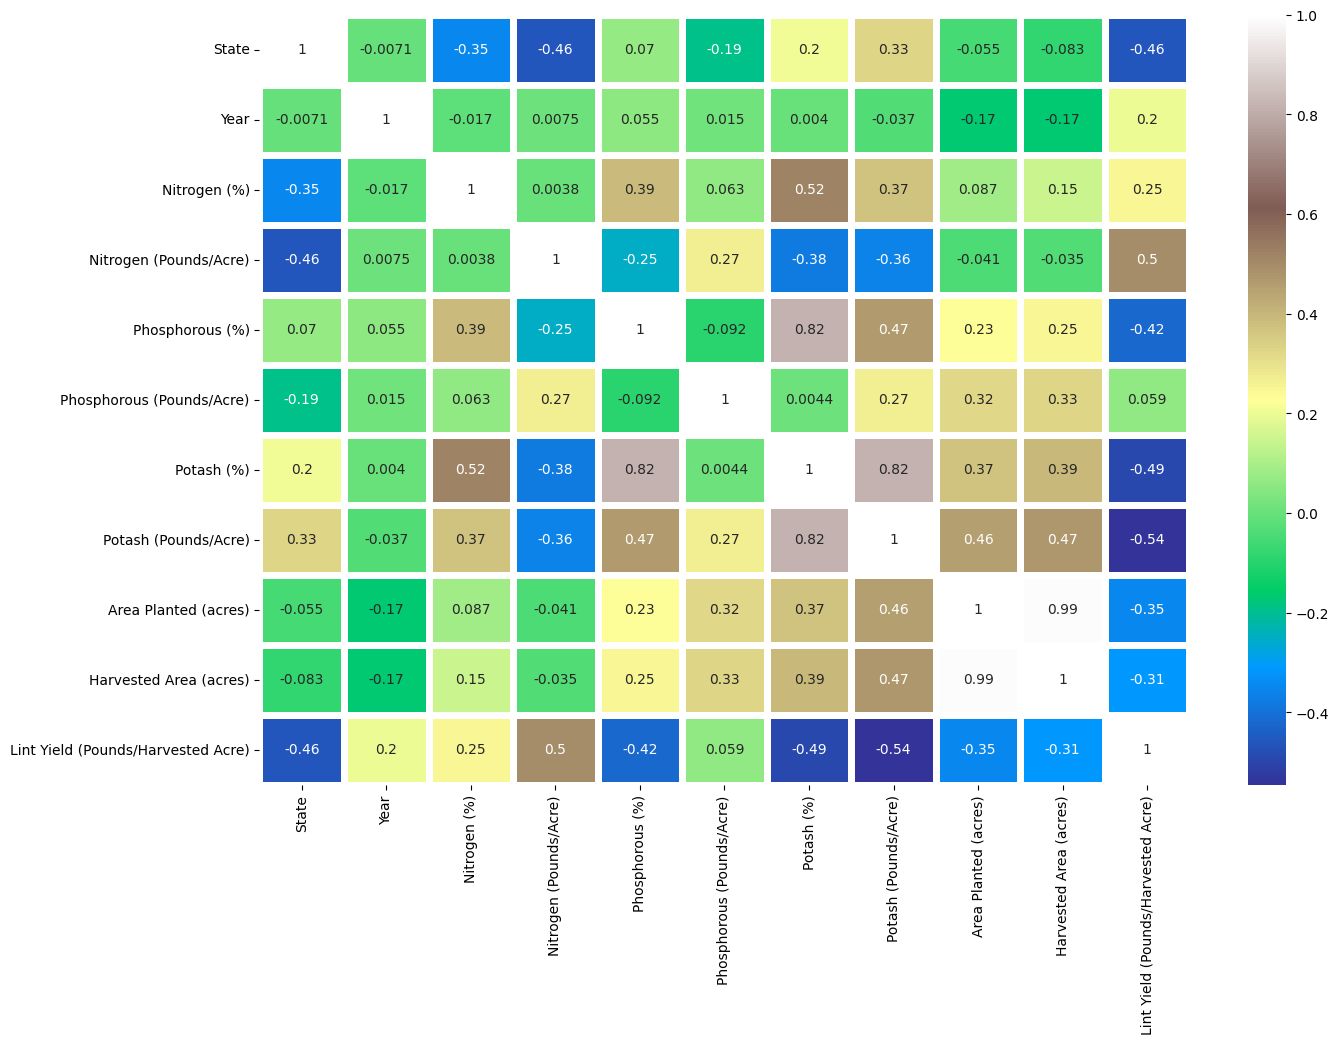

In [19]:
cor1, _ = pearsonr(df_cotton['State'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Nitrogen (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Phosphorous (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (%)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Potash (Pounds/Acre)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Area Planted (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_cotton['Harvested Area (acres)'], df_cotton['Lint Yield (Pounds/Harvested Acre)']) 
print('Pearsons correlation: %.3f' % cor1)

#create a correlation heatmap
sns.heatmap(df_cotton.corr(),annot=True,cmap='terrain',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(15,10)

#negative means less correlation

In [20]:
#No need to drop any columns since the Pearson Correlations are upwards 0.2 (medium relations)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(137, 10) (35, 10) (137,) (35,)


In [21]:
from sklearn import ensemble
yield_predict = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [22]:
yield_predict.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [23]:
yield_predict_test=yield_predict.predict(x_test)
yield_predict_train=yield_predict.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':yield_predict_train})

,actual unseen data,predicted unseen data
31,818,826.297250
6,946,935.606697
132,847,840.961497
10,988,972.614370
93,952,957.839662
...,...,...
167,547,549.449021
34,1064,1064.408107
95,1203,1203.321002
100,1141,1139.206557


In [24]:
scores = cross_val_score(yield_predict, x_test, y_test, cv=5)
scores

array([ 0.87721734,  0.62487781,  0.73401936, -0.86658614,  0.70319661])

In [25]:
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)
accuracy

0.7396748297343685

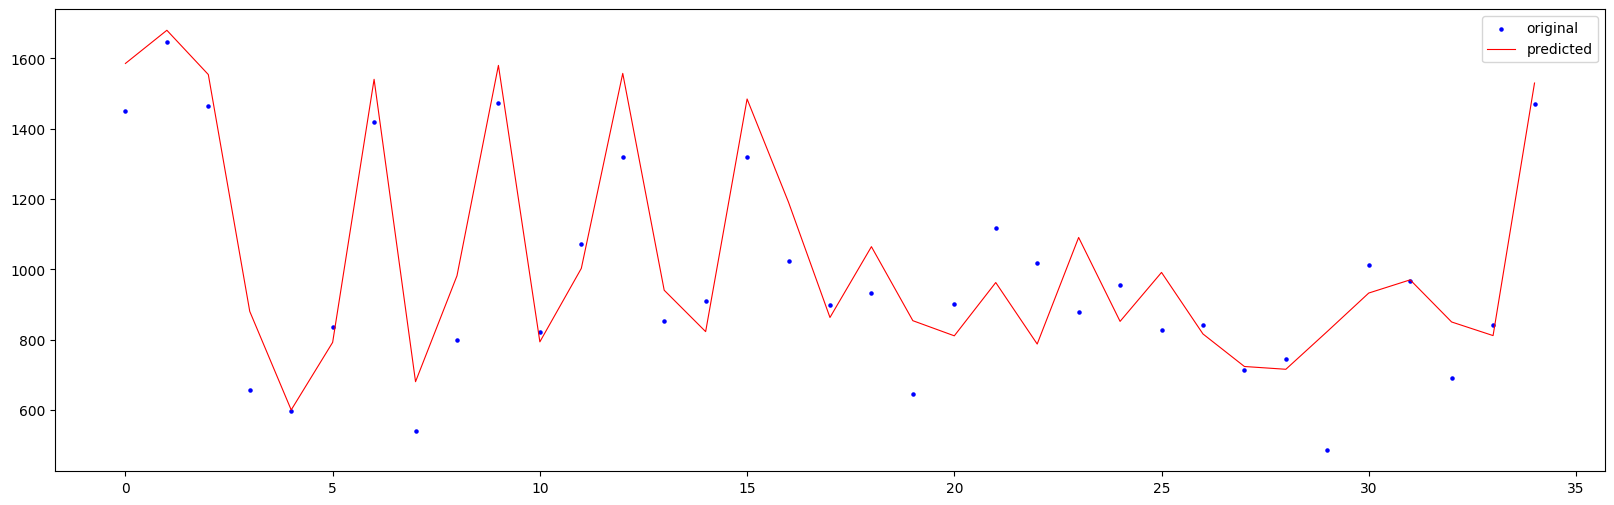

In [26]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, yield_predict_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [27]:
print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test))
print('R2 value= ',yield_predict.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,yield_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,yield_predict_test)))

MAE=  113.83928408220402
MSE=  19208.661552354504
R2 value=  0.7783853592938064
Adjusted R2 value=  0.7754106661299649
RMSE (train)=  6.149884451794822
RMSE (test)=  138.5953157662787


In [28]:
df_cotton['Lint Yield (Pounds/Harvested Acre)'].max() - df_cotton['Lint Yield (Pounds/Harvested Acre)'].min()

1424